In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 144s 1us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

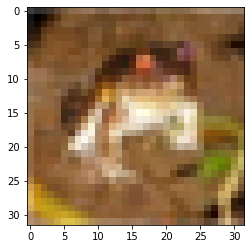

In [6]:
plt.imshow(X_train[0])

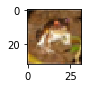

In [11]:
plt.figure(figsize=(15,1))
plt.imshow(X_train[0])

In [19]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [22]:
y_train=y_train.reshape(-1,)

In [24]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [25]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

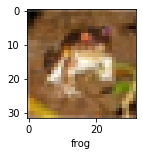

In [26]:
plot_sample(X_train,y_train,0)

Normalize the data, since values ranging between 0 to 255. Lets scale them in the rane of 0 to 1.

In [27]:
X_train = X_train/255
X_test=X_test/255

In [28]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

# Simple ANN

In [30]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

In [53]:
ann.fit(X_train,y_train,epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 291s 6ms/sample - loss: 1.6607 - accuracy: 0.4117
Epoch 2/10
50000/50000 [==============================] - 169s 3ms/sample - loss: 1.5711 - accuracy: 0.4423
Epoch 3/10
50000/50000 [==============================] - 198s 4ms/sample - loss: 1.5101 - accuracy: 0.4670
Epoch 4/10
50000/50000 [==============================] - 198s 4ms/sample - loss: 1.4605 - accuracy: 0.4839
Epoch 5/10
50000/50000 [==============================] - 174s 3ms/sample - loss: 1.4161 - accuracy: 0.5037
Epoch 6/10
50000/50000 [==============================] - 164s 3ms/sample - loss: 1.3770 - accuracy: 0.5146
Epoch 7/10
50000/50000 [==============================] - 172s 3ms/sample - loss: 1.3416 - accuracy: 0.5292
Epoch 8/10
50000/50000 [==============================] - 162s 3ms/sample - loss: 1.3076 - accuracy: 0.5394
Epoch 9/10
50000/50000 [==============================] - 177s 4ms/sample - loss: 1.2762 - accuracy: 0.5525
Epoch

In [54]:
ann.evaluate(X_test,y_test)

10000/10000 [==============================] - 33s 3ms/sample - loss: 1.4024 - accuracy: 0.4883


[1.4024442678451539, 0.4883]

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n" , classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.33      0.65      0.43      1000
           1       0.57      0.23      0.33      1000
           2       0.44      0.06      0.11      1000
           3       0.39      0.17      0.24      1000
           4       0.42      0.33      0.37      1000
           5       0.47      0.22      0.30      1000
           6       0.42      0.49      0.45      1000
           7       0.35      0.48      0.41      1000
           8       0.56      0.18      0.28      1000
           9       0.27      0.81      0.41      1000

    accuracy                           0.36     10000
   macro avg       0.42      0.36      0.33     10000
weighted avg       0.42      0.36      0.33     10000



# CNN

In [42]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [43]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
cnn.fit(X_train, y_train, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 332s 7ms/sample - loss: 1.4364 - accuracy: 0.4841
Epoch 2/10
50000/50000 [==============================] - 184s 4ms/sample - loss: 1.0782 - accuracy: 0.6223
Epoch 3/10
50000/50000 [==============================] - 168s 3ms/sample - loss: 0.9549 - accuracy: 0.6676
Epoch 4/10
50000/50000 [==============================] - 187s 4ms/sample - loss: 0.8757 - accuracy: 0.6950
Epoch 5/10
50000/50000 [==============================] - 181s 4ms/sample - loss: 0.8112 - accuracy: 0.7180
Epoch 6/10
50000/50000 [==============================] - 158s 3ms/sample - loss: 0.7577 - accuracy: 0.7377
Epoch 7/10
50000/50000 [==============================] - 180s 4ms/sample - loss: 0.7075 - accuracy: 0.7537
Epoch 8/10
50000/50000 [==============================] - 183s 4ms/sample - loss: 0.6646 - accuracy: 0.7678
Epoch 9/10
50000/50000 [==============================] - 157s 3ms/sample - loss: 0.6275 - accuracy: 0.7809
Epoch

In [45]:
cnn.evaluate(X_test,y_test)

10000/10000 [==============================] - 23s 2ms/sample - loss: 0.9042 - accuracy: 0.6971


[0.9042265451431274, 0.6971]

In [46]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.37731346e-04, 9.12856849e-05, 4.33669798e-03, 9.57511544e-01,
        1.42584732e-02, 1.90120470e-02, 3.09749879e-03, 5.17982990e-05,
        1.34127971e-03, 1.61682095e-04],
       [1.26398045e-05, 2.41362187e-03, 2.60799538e-09, 2.52647766e-07,
        4.76903850e-09, 4.12098550e-10, 2.45768184e-10, 6.06749928e-10,
        9.97335494e-01, 2.38072753e-04],
       [1.54942768e-02, 3.21738026e-03, 3.01384163e-04, 2.72342702e-03,
        2.15366119e-04, 4.12533409e-05, 6.64213439e-05, 1.78963484e-04,
        9.72041249e-01, 5.72017767e-03],
       [9.55554545e-01, 5.02036186e-03, 3.49096721e-03, 5.86439215e-04,
        7.38670933e-04, 5.89383035e-06, 1.62070543e-02, 1.24429380e-05,
        1.81123391e-02, 2.71278870e-04],
       [5.09898700e-06, 2.38370149e-06, 2.30497634e-03, 4.42997254e-02,
        7.56407250e-03, 4.41634236e-03, 9.41387951e-01, 9.12386099e-07,
        1.19252554e-05, 6.71240150e-06]], dtype=float32)

In [47]:
np.argmax(y_pred[0])

3

In [48]:
y_classes=[np.argmax(element) for element in y_pred]

In [49]:
y_classes[:5]

[3, 8, 8, 0, 6]

In [50]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [51]:
classes[y_classes[1]]

'ship'

In [52]:
print("classification report: \n",classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.79      0.67      0.73      1000
           1       0.86      0.77      0.81      1000
           2       0.69      0.49      0.57      1000
           3       0.49      0.55      0.52      1000
           4       0.63      0.69      0.66      1000
           5       0.62      0.56      0.59      1000
           6       0.73      0.79      0.76      1000
           7       0.73      0.78      0.76      1000
           8       0.76      0.83      0.80      1000
           9       0.72      0.83      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

